<a href="https://colab.research.google.com/github/ImajiPietersz/FYP/blob/main/NASA_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hashaninimeshika","key":"95beb196deca7c93b02c84e31a9057d8"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change the permission
!chmod 600  ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d vinayak123tyagi/bearing-dataset

100% 1.55G/1.56G [01:08<00:00, 24.3MB/s]
100% 1.56G/1.56G [01:08<00:00, 24.5MB/s]


In [5]:
from zipfile import ZipFile
file_name = "bearing-dataset.zip"

with ZipFile(file_name, 'r') as zip1:
  zip1.extractall()
  print('Done')

Done


In [6]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os


In [12]:
import matplotlib.pyplot as plt


In [ ]:
#We will calculate following time domain features.

# Maximum value
# Minimum value
# Mean value
# Standard deviation (Unbiased std)
# Root mean square value (RMS)
# Skewness - lack of symmetry
# Kurtosis - the sharpness of the peak
# Crest factor =  Max/RMS 
# Form factor =  RMS/Mean

In [19]:
def compute_skewness(x):
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [20]:
def compute_kurtosis(x):  
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [27]:
Time_feature_matrix=pd.DataFrame()

In [28]:
test_set=2
bearing_no=1
path='2nd_test/2nd_test'

In [ ]:
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = Time_feature_matrix.append(df)

In [30]:
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

# **Pure Data**

In [31]:
Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578


In [32]:
# x is my training data
# mu is the mean
# std is the standard deviation
mu=0.0
std = 0.1
def gaussian_noise(x,mu,std):
    noise = np.random.normal(mu, std, size = x.shape)
    x_noisy = x + noise
    return x_noisy 

# **N0isy Data**

In [46]:
noisy_df = gaussian_noise(Time_feature_matrix, mu,std)

In [48]:
noisy_df

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.514275,-0.411541,0.173721,0.115346,0.187997,0.177616,0.772515,6.184235,-7.372926
2004-02-12 10:42:00,0.346840,-0.486141,0.088334,0.085674,0.250036,-0.136645,0.695346,4.899423,-29.208893
2004-02-12 10:52:00,0.545710,-0.509415,-0.027731,0.314489,0.093642,-0.088062,0.436750,6.609056,-30.702968
2004-02-12 11:02:00,0.598114,-0.649128,-0.104428,0.037581,0.047904,0.074489,1.078290,7.542361,-34.569674
2004-02-12 11:12:00,0.416623,-0.412249,0.177028,0.041620,0.009814,0.015054,0.652282,5.134796,-32.616164
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,5.118846,-5.013433,-0.046971,0.850339,0.770608,-0.403327,12.420494,6.979223,-263.459011
2004-02-19 05:52:00,2.656539,-2.937293,0.164195,0.260386,0.421215,-0.241861,3.645121,5.851990,-102.937374
2004-02-19 06:02:00,3.638550,-3.799436,-0.023598,0.544305,0.642785,-0.461885,4.961034,7.264838,-284.254365
2004-02-19 06:12:00,-0.131148,-0.122261,-0.034360,0.128310,0.067824,0.559707,3.553002,2.305305,1.041232


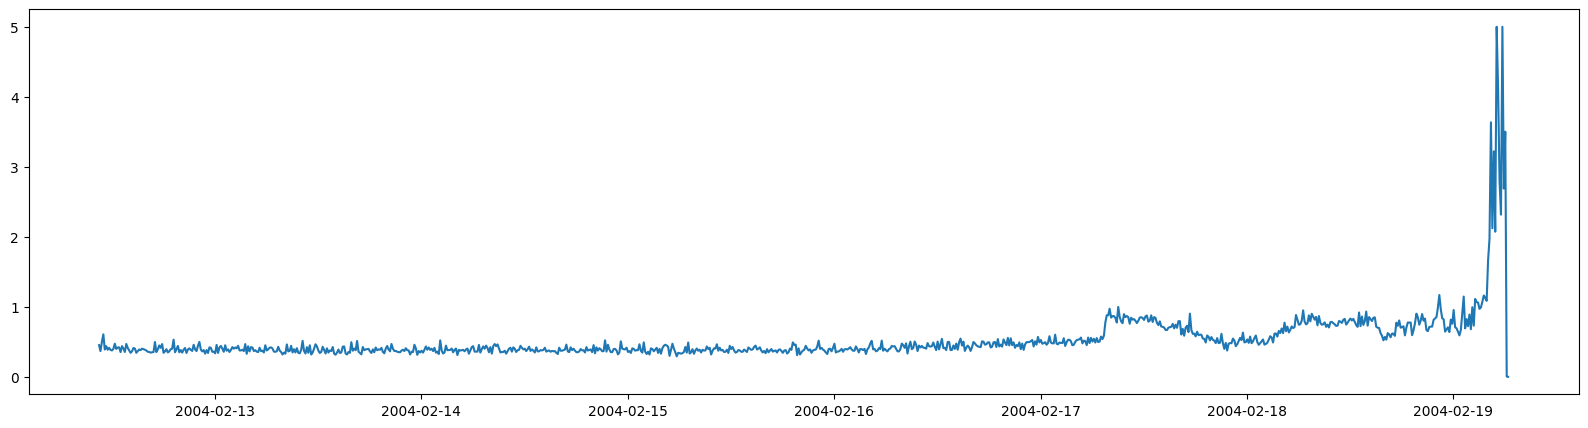

In [44]:
plt.figure(figsize=(20,5)) 
plt.plot(Time_feature_matrix.index,Time_feature_matrix['Max'])
plt.show()


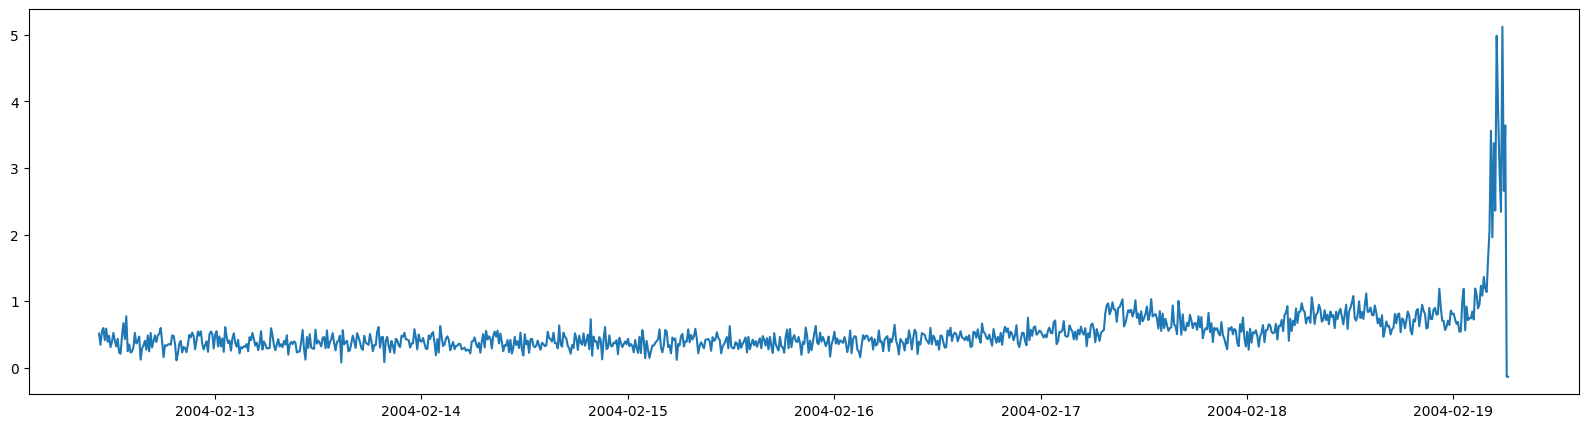

In [47]:
plt.figure(figsize=(20,5)) 
plt.plot(noisy_df.index,noisy_df['Max'])
plt.show()

In [49]:
# 1- pure
#0 - noisy

Time_feature_matrix = Time_feature_matrix.assign(target=1)

In [50]:
Time_feature_matrix.head()

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,target
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307,1
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382,1
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508,1
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322,1
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152,1


In [58]:
Time_feature_matrix.dtypes

Max             float64
Min             float64
Mean            float64
Std             float64
RMS             float64
Skewness        float64
Kurtosis        float64
Crest Factor    float64
Form Factor     float64
target            int64
dtype: object

In [59]:
Time_feature_matrix=Time_feature_matrix.reset_index()

In [51]:
noisy_df = noisy_df.assign(target=0)

In [52]:
noisy_df.head()

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,target
2004-02-12 10:32:00,0.514275,-0.411541,0.173721,0.115346,0.187997,0.177616,0.772515,6.184235,-7.372926,0
2004-02-12 10:42:00,0.346840,-0.486141,0.088334,0.085674,0.250036,-0.136645,0.695346,4.899423,-29.208893,0
2004-02-12 10:52:00,0.545710,-0.509415,-0.027731,0.314489,0.093642,-0.088062,0.436750,6.609056,-30.702968,0
2004-02-12 11:02:00,0.598114,-0.649128,-0.104428,0.037581,0.047904,0.074489,1.078290,7.542361,-34.569674,0
2004-02-12 11:12:00,0.416623,-0.412249,0.177028,0.041620,0.009814,0.015054,0.652282,5.134796,-32.616164,0


In [60]:
noisy_df=noisy_df.reset_index()

In [62]:
import tensorflow as tf
from tensorflow.keras import layers

In [63]:
def generateFrames(size = 6,overlap = True):
  # generate overlapping frames
  list_of_dfs = [Time_feature_matrix.loc[i:i+size-1,:] for i in range(0, len(Time_feature_matrix), 1 if overlap else size) if i < len(Time_feature_matrix) - size]
  
  data = []

  for d in list_of_dfs:
    if(len(d)==size):
      values = d[['RMS']].values.flatten()
      min_val = tf.reduce_min(values)
      max_val = tf.reduce_max(values)
      values = (values - min_val) / (max_val - min_val)
      data.append(values)

  data = np.array(data)

  return (data)

In [64]:
def splitTrainTest(ratio, data):
  
  x_train, x_test = np.split(data, [round(len(data) * ratio), len(data)])
  return (x_train,x_test)

In [65]:
frames = generateFrames(20)
train_data, test_data = splitTrainTest(0.7, frames)

(len(train_data),len(test_data))

ValueError: ignored

In [66]:
frames

array([[0.        , 0.21166447, 0.36069086, ..., 0.60569191, 0.64135763,
        0.83616293],
       [0.        , 0.18903929, 0.74543684, ..., 0.5450638 , 0.79217343,
        0.81345463],
       [0.12351069, 0.7248672 , 0.66473263, ..., 0.77538028, 0.79838108,
        0.8790965 ],
       ...,
       [0.05589864, 0.        , 0.00590019, ..., 0.31481433, 1.        ,
        0.46691525],
       [0.        , 0.00590019, 0.03209086, ..., 1.        , 0.46691525,
        0.51115232],
       [0.32158515, 0.33945875, 0.40819715, ..., 0.63620091, 0.66639011,
        0.        ]])

In [ ]:
model = tf.keras.Sequential([
    # todo:  no longer multivarite
    tf.keras.layers.Dense(128, activation='softmax'),
    tf.keras.layers.Dense(64, activation='softmax'),
    tf.keras.layers.Dense(32, activation='softmax'),
    tf.keras.layers.Dense(16, activation='softmax'),
    tf.keras.layers.Dense(12, activation='softmax'),
    tf.keras.layers.Dense(6, activation='softmax'),
    tf.keras.layers.Dense(3, activation='softmax'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_data, epochs=10)